In [39]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

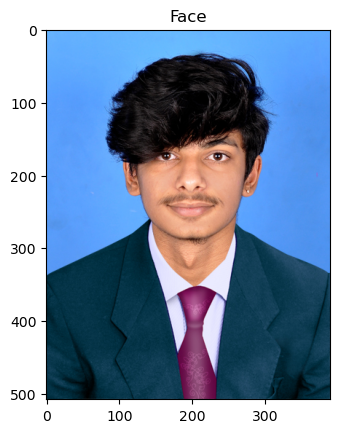

In [43]:
# Load the Face Image
faceImage = cv2.imread('photo.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [44]:
faceImage.shape

(508, 390, 3)

Text(0.5, 1.0, 'glassPNG')

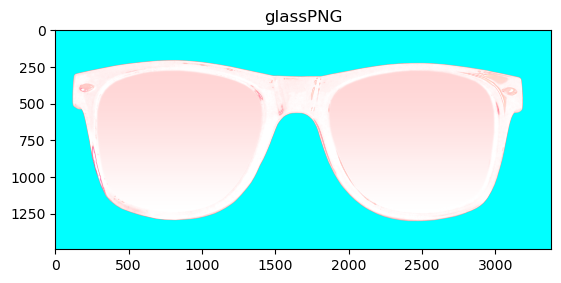

In [46]:
glassPNG = cv2.imread('glass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

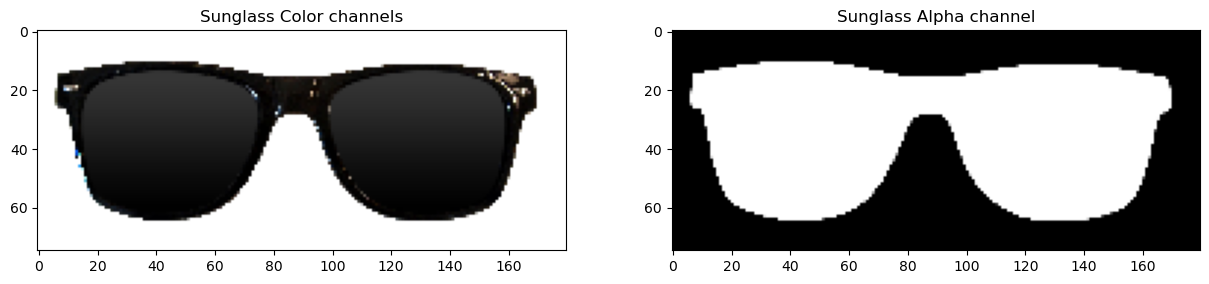

In [48]:
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

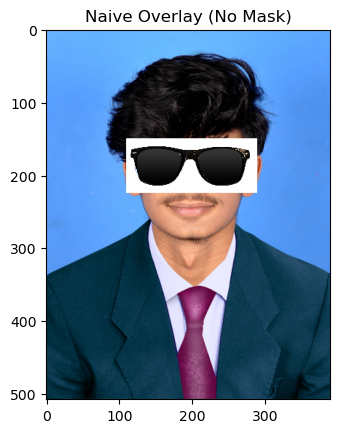

In [49]:
import cv2
import matplotlib.pyplot as plt

# Load images
faceImage = cv2.imread("Photo.jpg")
glassPNG = cv2.imread("glass.png", -1)

# Extract BGR channels (ignore alpha for naive placement)
glassBGR = glassPNG[:, :, :3]

# Resize glasses to fit
glassBGR = cv2.resize(glassBGR, (180, 75))  # (width, height)

# Copy face
faceWithGlassesNaive = faceImage.copy()

# Define region coordinates properly (y:y+h, x:x+w)
y, x = 150, 110   # top-left corner
h, w = glassBGR.shape[:2]

# Replace ROI with glasses
faceWithGlassesNaive[y:y+h, x:x+w] = glassBGR

# Show result
plt.imshow(faceWithGlassesNaive[..., ::-1])
plt.title("Naive Overlay (No Mask)")
plt.show()

Face shape: (508, 390, 3)
Original Glasses shape: (1494, 3381, 4)
Resized Glasses shape: (75, 180, 4)


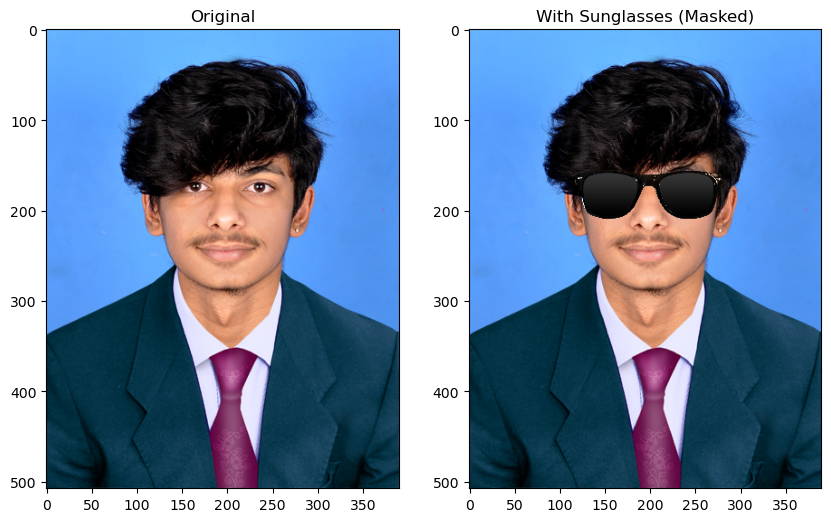

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your face image
faceImage = cv2.imread("Photo.jpg")
print("Face shape:", faceImage.shape)

# Load sunglasses PNG with alpha channel
glassPNG = cv2.imread("glass.png", -1)   # must have 4 channels
print("Original Glasses shape:", glassPNG.shape)

# Resize sunglasses (adjust size as needed)
glassPNG = cv2.resize(glassPNG, (180, 75))  # width=250, height=80
print("Resized Glasses shape:", glassPNG.shape)

# Separate BGR and Alpha
glassBGR = glassPNG[:, :, :3]
glassMask1 = glassPNG[:, :, 3]

# Convert alpha channel (1-channel) to 3 channels
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))

# Normalize mask (0 or 1 values)
glassMask = np.uint8(glassMask / 255)

# Copy face image
faceWithGlasses = faceImage.copy()

# Define placement (top-left corner of sunglasses)
x, y = 111, 145  # adjust these values for position
h, w = glassBGR.shape[:2]

# Extract Region of Interest (ROI) from the face
roi = faceWithGlasses[y:y+h, x:x+w]

# Masked regions
maskedEye   = cv2.multiply(roi, (1 - glassMask))   # remove sunglass area from ROI
maskedGlass = cv2.multiply(glassBGR, glassMask)    # keep sunglass area

# Combine both
roiFinal = cv2.add(maskedEye, maskedGlass)

# Place combined result back on face
faceWithGlasses[y:y+h, x:x+w] = roiFinal

# Show results
plt.figure(figsize=[10,15])
plt.subplot(121); plt.imshow(faceImage[:,:,::-1]); plt.title("Original")
plt.subplot(122); plt.imshow(faceWithGlasses[:,:,::-1]); plt.title("With Sunglasses (Masked)")
plt.show()